In [1]:
import pandas as pd
import io
from google.colab import files

In [4]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=8f1d73c2f83842f12565b03159cfd44c6895fabbd6deec1d9a664ce2d7730aac
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [7]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [10]:

!kaggle datasets download -d cryptexcode/banfakenews

 93% 57.0M/61.5M [00:00<00:00, 60.2MB/s]
100% 61.5M/61.5M [00:00<00:00, 96.6MB/s]


In [11]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [12]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [13]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [19]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [23]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

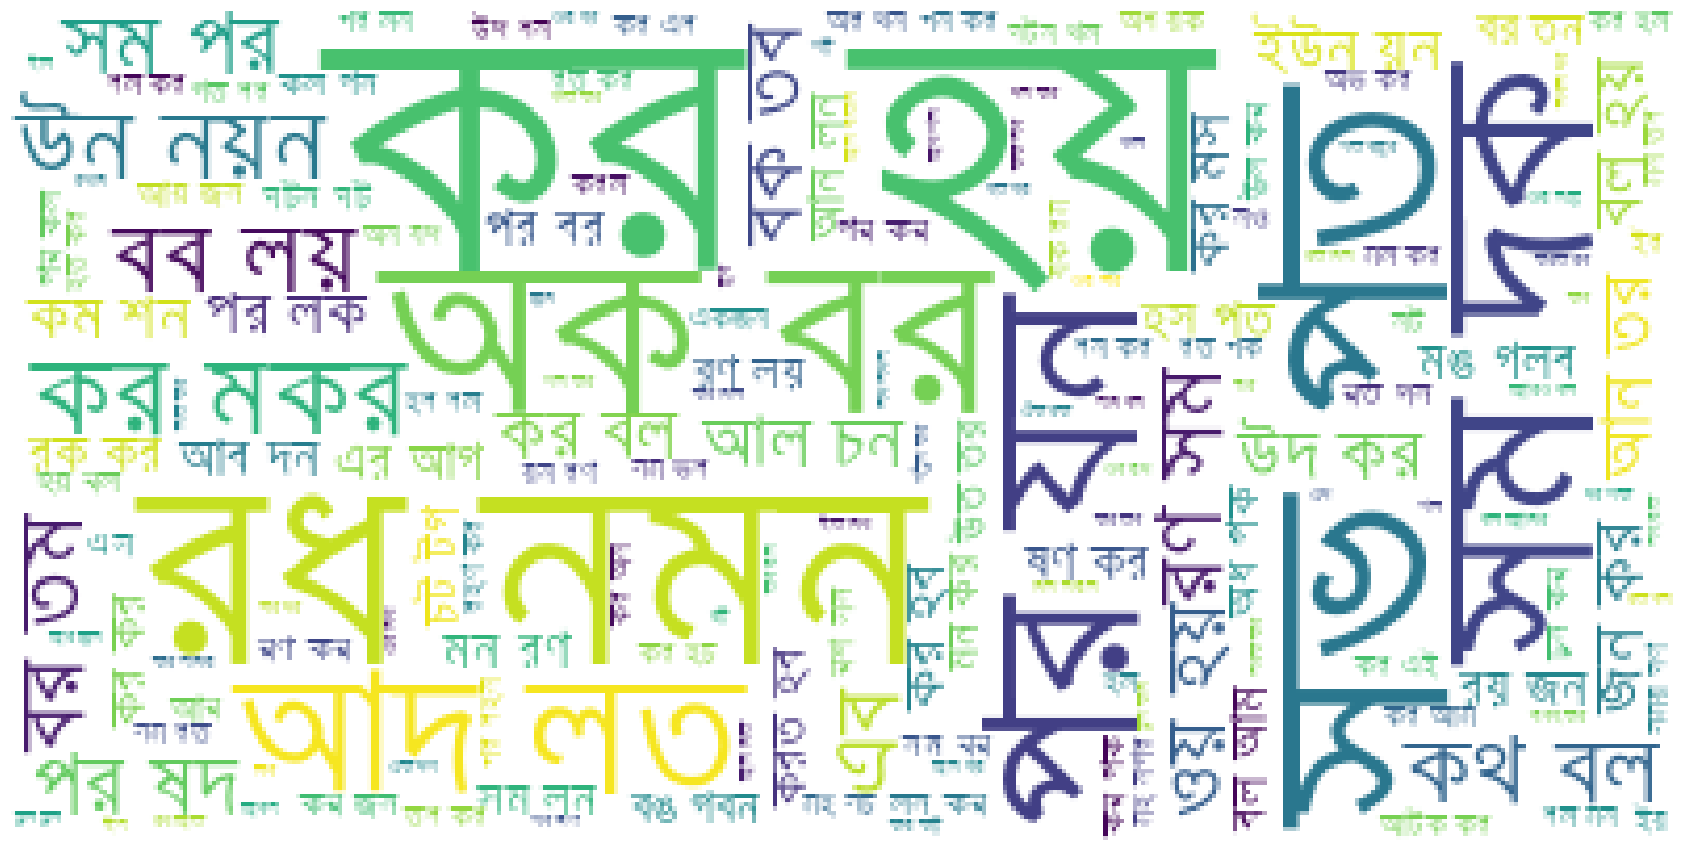

In [26]:

s = listToString(real['headline'] )

# Read the whole text.
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=70, relative_scaling=.5, font_path = "/content/Siyamrupali.ttf").generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [14]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
df = pd.concat([real,fake])

In [28]:
df = df.sample(frac = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


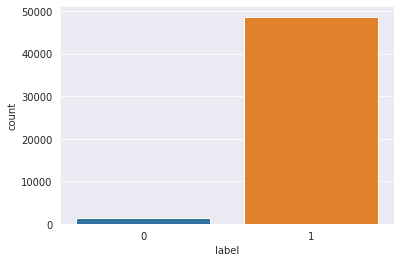

In [29]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [30]:
df.isna().sum() # Checking for nan Values

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [31]:
df['content'] = df['content'] + " " + df['headline']

In [32]:
df.head()

articleID  ... label
34348      43439  ...     1
48075      61062  ...     1
43777      55638  ...     1
1082        1167  ...     1
9550       12029  ...     1

[5 rows x 7 columns]

In [33]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [34]:
df.head()

content  label
34348  পাকিস্তানের প্রধানমন্ত্রী হিসেবে প্রথম সরকারি ...      1
48075  আবারও শক্তিশালী ভূমিকম্প আঘাত আনলো ইন্দোনেশিয়া...      1
43777  বিএনপির চেয়ারপারসন খালেদা জিয়াকে চিকিৎসার জন্য...      1
1082   বিএনপির দাবির প্রতি ক্ষমতাসীনরা গা না করার মধ্...      1
9550   নিজস্ব সংবাদদাতা, নেত্রকোনা ॥ হেরোইন কেনাবেচার...      1

In [ ]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 8.8MB/s 
     |████████████████████████████████| 747kB 33.2MB/s 


In [ ]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop = set(stopwords())
punctuation = list(string.punctuation)
stop.update(punctuation)
#type(stop)
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন'

In [ ]:
df

content  label
8373   এবার ওয়ালটন টেলিভিশন কিনে নতুন গাড়ি পেলেন চুয়া...      1
45442  আসছে ফুটবল বিশ্বকাপের আসর বসবে কাতারে। ২০২২ বি...      1
34865  অসামান্য এক প্রতিভাধর ক্রিকেটার তিনি। যেমনই প্...      1
31763  বেসামরিক বিমান পরিবহন মন্ত্রণালয় থেকে সম্প্রতি...      1
2351   দিনাজপুরের বীরগঞ্জের পলাশবাড়ী ইউনিয়নে বঙ্গবন্ধ...      1
...                                                  ...    ...
5304   সড়ক পরিবহন খাতে শৃঙ্খলা ফেরাতে ভ্রাম্যমাণ আদাল...      1
10292  সোনালি আঁশের জন্য খ্যাত ফরিদপুর জেলা। আর এই পা...      1
7103   অনেকেই ত্বকের পরিচর্যা করার সময় অনেকদিকে খেয়াল...      1
28538  বিশ্বব্যাংক বলছে, বাংলাদেশে চলতি অর্থবছরে মোট ...      1
35533  যশোরে ছয় হাজার ইয়াবাস সুমি বেগম নামে এক নারীকে...      1

[49977 rows x 2 columns]

In [ ]:
import string

In [ ]:
def no_punctuation(text):
    """Gets the spreadsheet's header column named 'english_version' and remove punctuations
                Parameters
                ----------
                text : str
                    The texts retrieved from the spreadsheet
                Returns
                -------
                list
                    a list of strings that are converted to lowercase
                """
    x = []
    for line in text:
        no_punc = line.translate(str.maketrans('', '', string.punctuation))
        x.insert(0, no_punc)
    return x[::-1]

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
print(PUNCT_TO_REMOVE)
PUNCT_TO_REMOVE = PUNCT_TO_REMOVE.replace("~","।")
print(PUNCT_TO_REMOVE)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}।


In [ ]:
df['content']=no_punctuation(df['content'])

In [ ]:
print(df.iloc[1,0])

আসছে ফুটবল বিশ্বকাপের আসর বসবে কাতারে। ২০২২ বিশ্বকাপে লিওনেল মেসির বয়স হবে ৩৫। স্বাভাবিকভাবেই সেই সময় তার ফর্ম পড়তির দিকে থাকার কথা। তবে সাবেক আর্জেন্টাইন কোচ জর্জ সাম্পাওলির কণ্ঠে ভিন্ন সুর। তার মতে সেই বয়সেও অধরা সোনালি ট্রফি জিততে পারে মেসি। এ জন্য দলীয় সমর্থনটা তার দরকার। রাশিয়া বিশ্বকাপটা যাচ্ছেতাই গেছে আর্জেন্টিনার। দ্বিতীয় রাউন্ডে ফ্রান্সের কাছে ৪৩ গোলে হেরে বিদায় নিয়েছেন দুবারের বিশ্বচ্যাম্পিয়নরা। সেই ভরাডুবির গ্লানি মাথায় নিয়ে কোচের পদ থেকে সরে যেতে হয়েছে সাম্পাওলিকে। এর পর মুখে কুলুপ এঁটে ছিলেন তিনি। অবশেষে মুখ খুললেন। এই প্রথম গণমাধ্যমের সামনে এলেন। সাম্পাওলি বলেন মেসি এখনও বিশ্বকাপ জিততে পারে। এ জন্য তাকে সমর্থন দিতে হবে। এ সমর্থনটা আসতে হবে আর্জেন্টিনা ফুটবল অ্যাসোসিয়েশনের এএফএ কাছ থেকে। তাকে ঘিরে পরিকল্পনা সাজালে সাফল্য আসবে। কাতার বিশ্বকাপের আগে আছে কোপা আমেরিকা। উপমহাদেশীয় শ্রেষ্ঠত্বের লড়াইয়ে শিরোপা জিতলে আত্মবিশ্বাসী হয়ে উঠবে আর্জেন্টিনা। তবে হেরে গেলে ভেঙে পড়া যাবে না। তিনি বলেন লাতিন আমেরিকা চ্যাম্পিয়ন হতে পারলে তা বাড়তি টনিক হিসেবে কাজ করবে আর্জেন্টিনার যা ফুটবলের ব

In [ ]:
print(df.iloc[1,0])

আসছে ফুটবল বিশ্বকাপের আসর বসবে কাতারে। ২০২২ বিশ্বকাপে লিওনেল মেসির বয়স ৩৫। স্বাভাবিকভাবেই সময় ফর্ম পড়তির থাকার কথা। সাবেক আর্জেন্টাইন কোচ জর্জ সাম্পাওলির কণ্ঠে ভিন্ন সুর। মতে বয়সেও অধরা সোনালি ট্রফি জিততে মেসি। দলীয় সমর্থনটা দরকার। রাশিয়া বিশ্বকাপটা যাচ্ছেতাই আর্জেন্টিনার। দ্বিতীয় রাউন্ডে ফ্রান্সের ৪৩ গোলে হেরে বিদায় নিয়েছেন দুবারের বিশ্বচ্যাম্পিয়নরা। ভরাডুবির গ্লানি মাথায় কোচের পদ সরে হয়েছে সাম্পাওলিকে। মুখে কুলুপ এঁটে তিনি। অবশেষে মুখ খুললেন। গণমাধ্যমের এলেন। সাম্পাওলি মেসি বিশ্বকাপ জিততে পারে। সমর্থন হবে। সমর্থনটা আসতে আর্জেন্টিনা ফুটবল অ্যাসোসিয়েশনের এএফএ থেকে। ঘিরে পরিকল্পনা সাজালে সাফল্য আসবে। কাতার বিশ্বকাপের কোপা আমেরিকা। উপমহাদেশীয় শ্রেষ্ঠত্বের লড়াইয়ে শিরোপা জিতলে আত্মবিশ্বাসী হয়ে উঠবে আর্জেন্টিনা। হেরে ভেঙে পড়া না। লাতিন আমেরিকা চ্যাম্পিয়ন পারলে বাড়তি টনিক হিসেবে আর্জেন্টিনার ফুটবলের বিশ্ব মঞ্চে ভালো আলবিসেলেস্তেদের সহায়তা করবে। দল হিসেবে গড়ে উঠতে হবে। কোপা হেরে ভেঙে পড়লে চলবে না। গুছিয়ে ফেলতে হবে। মেসি কেন্দ্র করে। সবশেষ বিশ্বকাপের আর্জেন্টিনার হয়ে খেলছেন ছোট ম্যাজিসিয়ান। আদ

In [ ]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

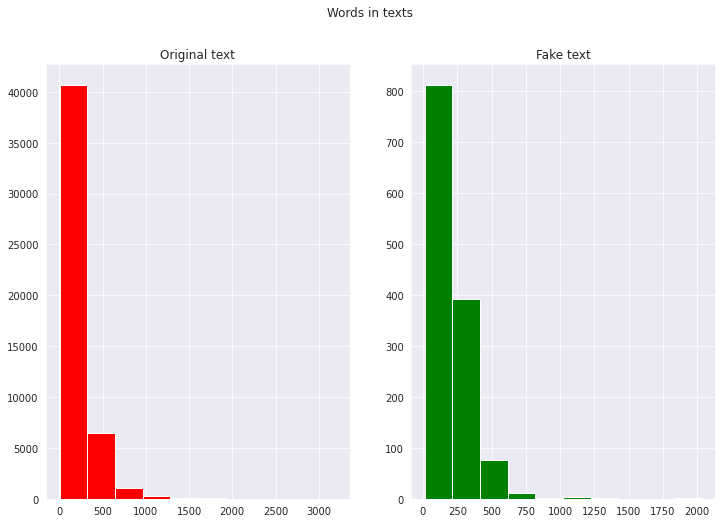

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

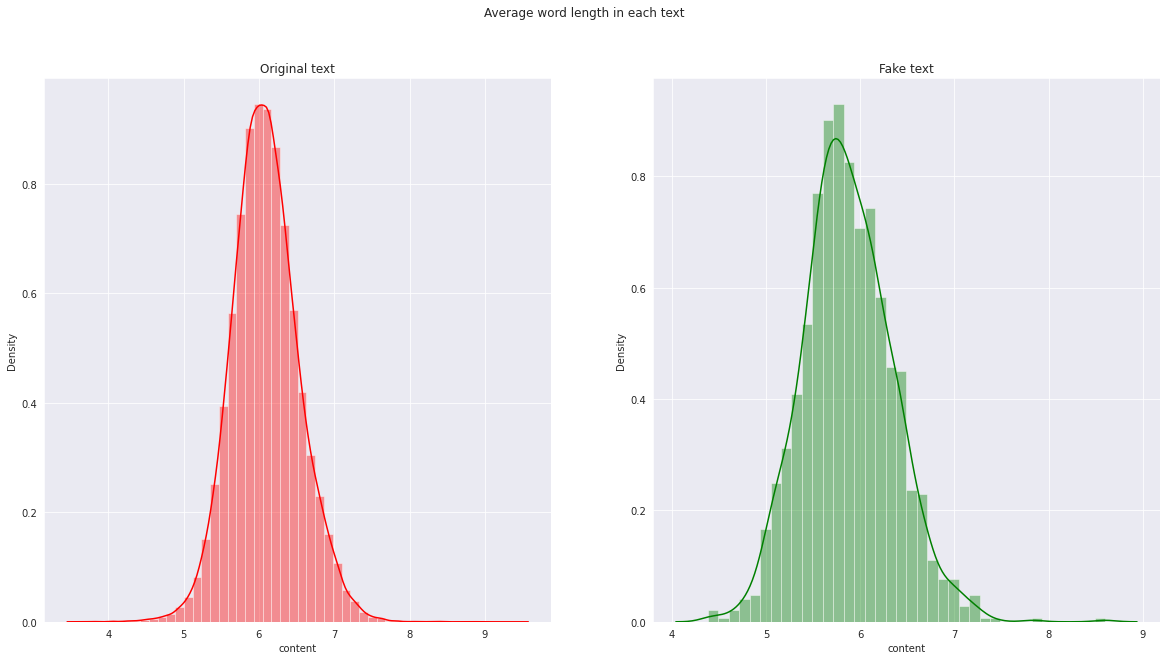

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

['ওয়ালটন',
 'টেলিভিশন',
 'কিনে',
 'গাড়ি',
 'পেলেন',
 'চুয়াডাঙ্গার',
 'এক',
 'চায়ের',
 'দোকানদার।',
 '‘ওয়ালটন']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'এক': 42903,
 'কথা': 27933,
 'দিয়ে': 26671,
 'না।': 34976,
 'বাংলাদেশ': 29179,
 'সময়': 33829,
 'হবে।': 33002,
 'হয়।': 43156,
 'হয়ে': 32337,
 'হয়েছে।': 40077}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.20,random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 318261.


In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39981, 300) (39981,)
(9996, 300) (9996,)


In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
all_embs.shape

(178153, 300)

In [ ]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/bn_glove.39M.300d.txt"
word = "ক্রিকেট"
res = bng.closest_word(glove_path, word)
print(res)

['ক্রিকেট', 'ক্রিকেটের', 'ক্রিকেটার', 'ক্রিকেটে', 'খেলার', 'আইসিসি', 'খেলা', 'ক্লাবের', 'দলের', 'ফুটবল']


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 256
epochs = 10
embed_size = 300

In [ ]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 10
BATCH_SIZE = 256

In [ ]:
embed = Embedding(max_features,
                  embed_size,
                  weights=[embedding_matrix],
                  trainable= False)

In [ ]:

inputs = Input(shape=(SEQ_LEN,), dtype='int32')
embed_sequence = embed(inputs)

embed_sequence = Dropout(WDROP_RATE)(embed_sequence)

In [ ]:

lstm1 = LSTM(RHIDDEN_SIZE, 
             kernel_regularizer=l2(RREG), 
             return_sequences = True)(embed_sequence)
lstm1 = Dropout(RDROP_RATE)(lstm1)

In [ ]:
cnn1 = Conv1D(filters = CHIDDEN_SIZE, 
              kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1)(lstm1)
cnn1 = Activation('relu')(cnn1)
cnn1 = MaxPooling1D(5)(cnn1)
cnn1 = Dropout(CDROP_RATE)(cnn1)

In [ ]:
out = Dense(units = 32 , activation = 'relu')(cnn1)
out = Dropout(DDROP_RATE)(out)


prediction = Dense(1, activation='sigmoid')(out)

In [ ]:
model = Model(inputs, prediction)

In [ ]:
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
dropout_72 (Dropout)         (None, 300, 300)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 300, 64)           93440     
_________________________________________________________________
dropout_73 (Dropout)         (None, 300, 64)           0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 300, 32)           6176      
_________________________________________________________________
activation_40 (Activation)   (None, 300, 32)           0  

In [ ]:

model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = model.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/10
157/157 [==============================] - 233s 1s/step - loss: 0.1531 - accuracy: 0.9632 - val_loss: 0.1320 - val_accuracy: 0.9751
Epoch 2/10
157/157 [==============================] - 231s 1s/step - loss: 0.1097 - accuracy: 0.9746 - val_loss: 0.1087 - val_accuracy: 0.9771
Epoch 3/10
157/157 [==============================] - 228s 1s/step - loss: 0.1092 - accuracy: 0.9748 - val_loss: 0.1069 - val_accuracy: 0.9771
Epoch 4/10
157/157 [==============================] - 228s 1s/step - loss: 0.1054 - accuracy: 0.9759 - val_loss: 0.1046 - val_accuracy: 0.9769
Epoch 5/10
157/157 [==============================] - 229s 1s/step - loss: 0.1064 - accuracy: 0.9754 - val_loss: 0.1001 - val_accuracy: 0.9773
Epoch 6/10
157/157 [==============================] - 228s 1s/step - loss: 0.1014 - accuracy: 0.9770 - val_loss: 0.1019 - val_accuracy: 0.9758
Epoch 7/10
157/157 [==============================] - 225s 1s/step - loss: 0.1054 - accuracy: 0.9760 - val_loss: 0.1003 - val_accuracy: 0.9775

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1250/1250 [==============================] - 85s 68ms/step - loss: 0.0969 - accuracy: 0.9775
Accuracy of the model on Training Data is -  97.74689674377441 %
313/313 [==============================] - 21s 68ms/step - loss: 0.0989 - accuracy: 0.9773
Accuracy of the model on Testing Data is -  97.72655963897705 %


In [ ]:
[test_cost, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Cost = {}, accuracy = {}".format(test_cost, (test_acc*100)))

313/313 [==============================] - 22s 69ms/step - loss: 0.0989 - accuracy: 0.9773
Evaluation result on Test Data : Cost = 0.09885849803686142, accuracy = 97.72655963897705


Text(0.5, 1.0, 'Accuracy Curves')

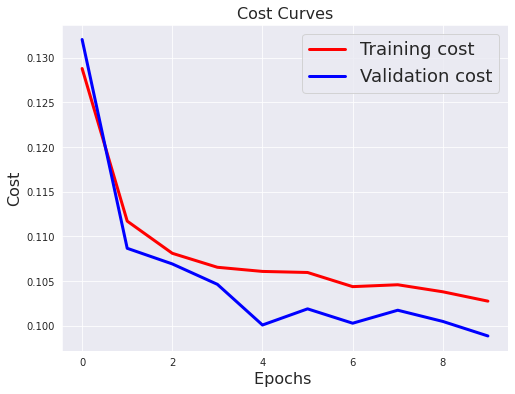

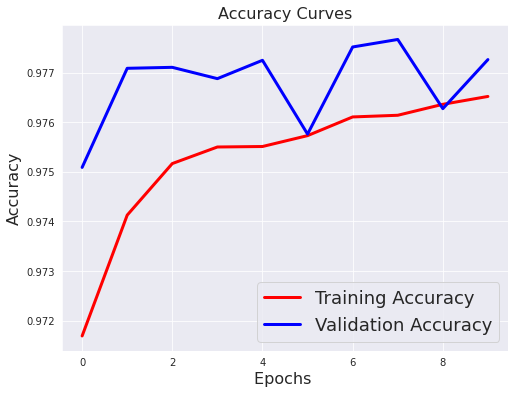

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
test_labels = y_test['content'].apply(lambda x: cate_dic[x])

KeyError: ignored

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.30 , dropout = 0.30))
model.add(LSTM(units=64 , recurrent_dropout = 0.30 , dropout = 0.30))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          219648    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,271,169
Trainable params: 271,169
Non-trainable params: 3,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
157/157 [==============================] - 983s 6s/step - loss: 0.1275 - accuracy: 0.9626 - val_loss: 0.0596 - val_accuracy: 0.9831
Epoch 2/10
157/157 [==============================] - 972s 6s/step - loss: 0.0593 - accuracy: 0.9822 - val_loss: 0.0464 - val_accuracy: 0.9858
Epoch 3/10
157/157 [==============================] - 954s 6s/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 4/10
157/157 [==============================] - 967s 6s/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0426 - val_accuracy: 0.9886
Epoch 5/10
157/157 [==============================] - 963s 6s/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0390 - val_accuracy: 0.9896
Epoch 6/10
157/157 [==============================] - 965s 6s/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 7/10
157/157 [==============================] - 968s 6s/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0385 - val_accuracy: 0.9890

In [ ]:
#Defining Neural Network
modelv2 = Sequential()
#Non-trainable embeddidng layer
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelv2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 256)          439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,607,809
Trainable params: 607,809
Non-trainable params: 3,000,000
_________________________________________________________________


In [ ]:
history = modelv2.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

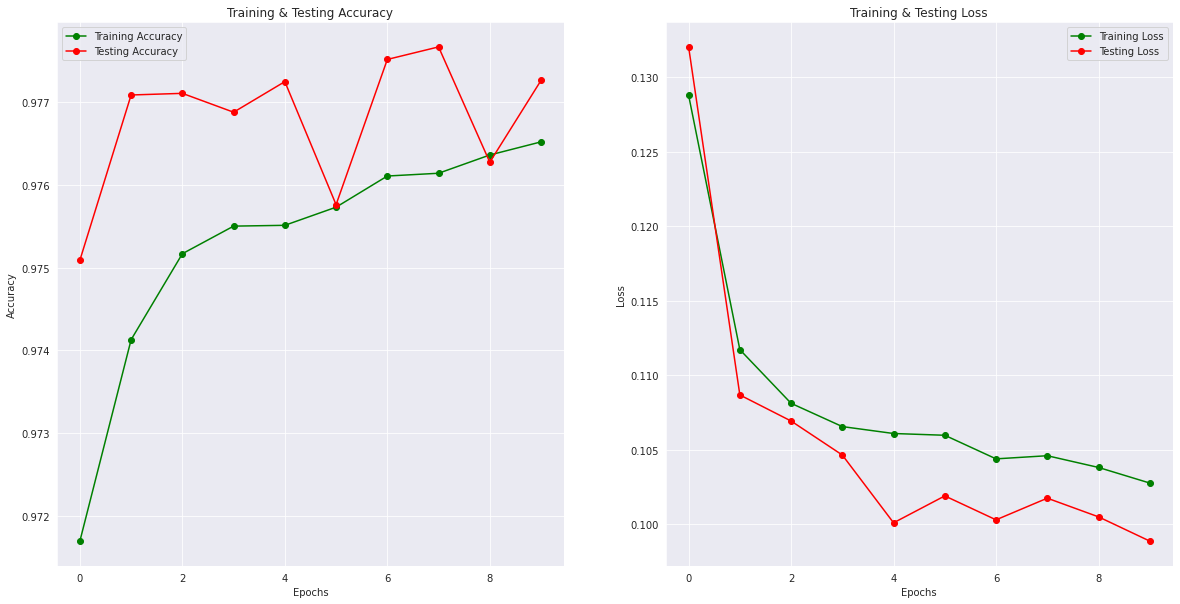

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.94      0.53      0.68       332
    Not Fake       0.99      1.00      0.99     12163

    accuracy                           0.99     12495
   macro avg       0.96      0.77      0.84     12495
weighted avg       0.99      0.99      0.98     12495



In [ ]:
cm = confusion_matrix(y_test,pred)

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

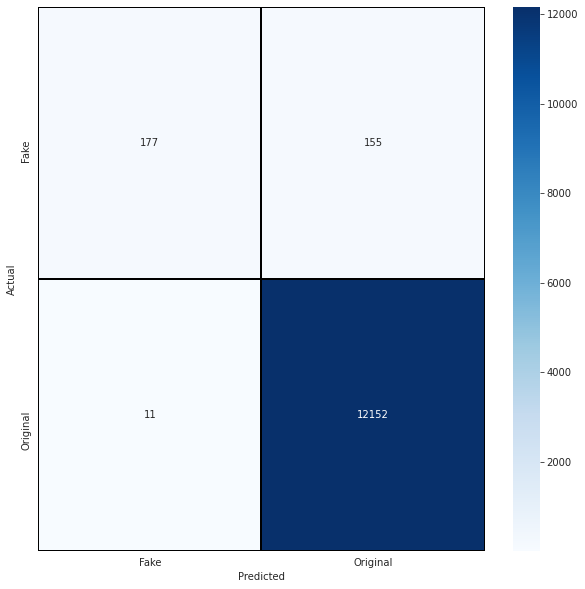

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")